In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA




# Import and read dataset


In [79]:
df = pd.read_csv('./Amazon Customer Behavior Survey.csv')

In [80]:
df.head(2)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [82]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [83]:
# drop rows with null values
df = df.dropna()

#drop timestamp
df = df.drop(columns = ['Timestamp'])

numerical = df.select_dtypes(include=['int64'])
categorical = df.select_dtypes(include=['object'])

In [84]:
numerical.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,30.780000,2.481667,2.700000,2.671667,2.463333
std,10.180914,1.185470,1.043303,0.901046,1.013427
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [85]:
numerical.var(axis=0)

age                                       103.651018
Customer_Reviews_Importance                 1.405339
Personalized_Recommendation_Frequency       1.088481
Rating_Accuracy                             0.811884
Shopping_Satisfaction                       1.027034
dtype: float64

# Apply One-hot and Ordinal encoding


In [86]:
categorical_columns_onehot = [
    "Gender", 
    "Purchase_Categories", 
    "Product_Search_Method", 
    "Search_Result_Exploration", 
    "Add_to_Cart_Browsing", 
    "Cart_Abandonment_Factors", 
    "Review_Left", 
    "Service_Appreciation", 
    "Improvement_Areas"
]


onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

onehot_encoded_data = onehot_encoder.fit_transform(df[categorical_columns_onehot])
onehot_encoded_df = pd.DataFrame(onehot_encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_columns_onehot))

categorical_columns_ordinal = [    
    "Purchase_Frequency", 
    "Personalized_Recommendation_Frequency", 
    "Browsing_Frequency", 
    "Cart_Completion_Frequency", 
    "Saveforlater_Frequency", 
    "Review_Reliability", 
    "Review_Helpfulness", 
    "Recommendation_Helpfulness"

]

ordinal_encoder = OrdinalEncoder()

ordinal_encoded_data = ordinal_encoder.fit_transform(df[categorical_columns_ordinal])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded_data, columns=categorical_columns_ordinal)

final_df = pd.concat([numerical, onehot_encoded_df, ordinal_encoded_df], axis=1)
final_df = final_df.dropna()

print(final_df)



      age  Customer_Reviews_Importance  \
0    23.0                          1.0   
1    23.0                          1.0   
2    24.0                          2.0   
3    24.0                          5.0   
4    22.0                          1.0   
..    ...                          ...   
595  23.0                          3.0   
596  25.0                          4.0   
597  23.0                          4.0   
598  23.0                          3.0   
599  23.0                          3.0   

     Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                                       2.0               1.0   
1                                       2.0               3.0   
2                                       4.0               3.0   
3                                       3.0               3.0   
4                                       4.0               2.0   
..                                      ...               ...   
595                                     

In [87]:
# Standarize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df)

# Find best K 

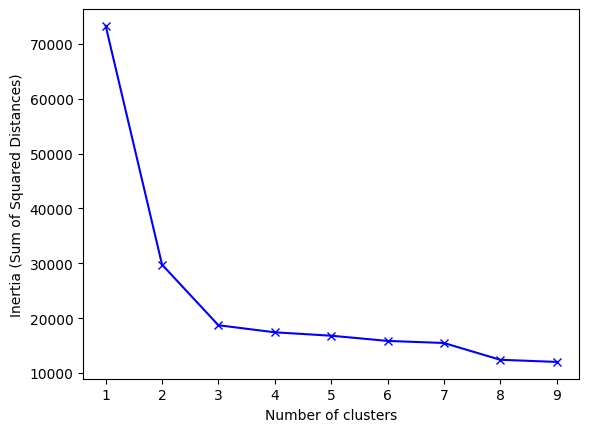

In [88]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of Squared Distances)');

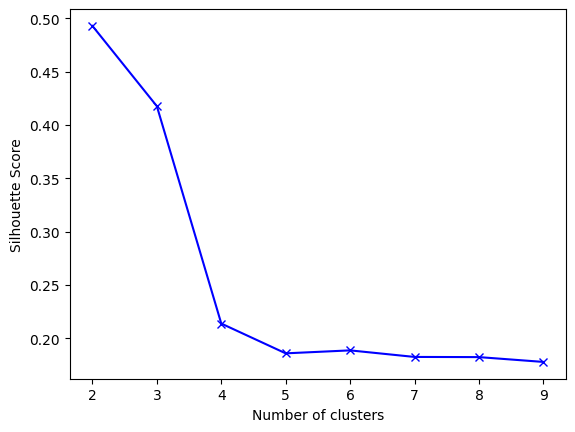

In [89]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
K = range(2, 10)  # Silhouette score requires at least two clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(final_df)
    silhouette_avg.append(silhouette_score(final_df, labels))

# Plot Silhouette Score
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');

In [90]:
est = KMeans(n_clusters=3)
clusters = est.fit_predict(final_df)
est.cluster_centers_.shape

(3, 79)

# Apply K means model and Plot

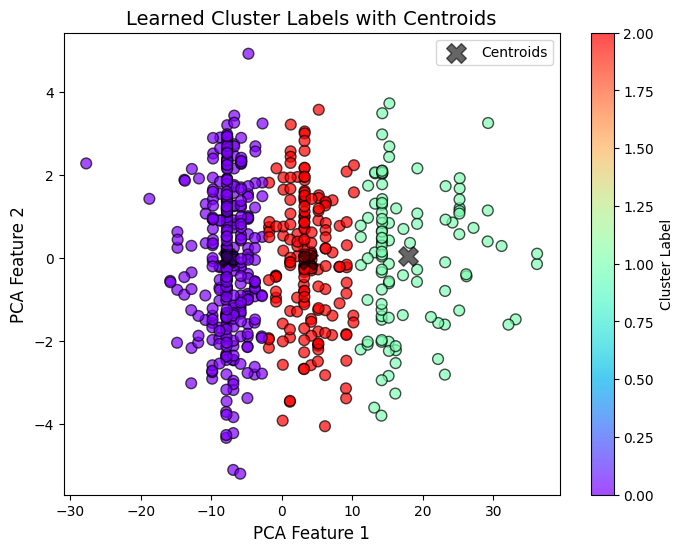

In [94]:
# Convert final_df to a NumPy array to avoid feature name mismatch
final_array = final_df.to_numpy()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Use the desired number of clusters
labels = kmeans.fit_predict(final_array)

# Perform PCA and transform both data and cluster centers
pca = PCA(n_components=2)
X_pca = pca.fit_transform(final_array)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Update cmap usage to avoid deprecation warning
kwargs = dict(cmap=plt.get_cmap('rainbow'), edgecolor='k', alpha=0.7)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data points with cluster labels
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=60, **kwargs)
ax.set_title('Learned Cluster Labels with Centroids', fontsize=14)
ax.set_xlabel('PCA Feature 1', fontsize=12)
ax.set_ylabel('PCA Feature 2', fontsize=12)
fig.colorbar(scatter, ax=ax, label='Cluster Label')

# Plot centroids
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')
ax.legend()

plt.show()